In [1]:
import os
os.environ["CDF_LIB"] = 'c:\cdf_distribution\cdf38_0-dist'
from spacepy import pycdf
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

import SEMP
import psp_dataprep

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
fname_ste = '../../testdata/stereo_level2_swaves_20190409_v01.cdf'
cdf_dataset = pycdf.CDF(fname_ste)

In [4]:
time_ste = np.array(cdf_dataset.get('Epoch'))
freq_ste = np.array(cdf_dataset.get('frequency'))
data_ste_A = np.array(cdf_dataset.get('avg_intens_ahead'))

C:\Users\Pjer1\Anaconda3\envs\lofarsun\lib\site-packages\spacepy\pycdf\__init__.py:3957: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.degen = numpy.zeros(self.dims, dtype=numpy.bool)
C:\Users\Pjer1\Anaconda3\envs\lofarsun\lib\site-packages\spacepy\pycdf\__init__.py:3958: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.rev = numpy.zeros(sel

In [5]:
freq_ste_select = np.array([	725.888319695363,	879.026793283920,	1064.47242963668,	1289.04097362438,	1560.98606729497,	1890.30259871247,	2289.09404738711,	2772.01732746500,	3356.82147814644,	4065.00000000000])

t_ste_select_ste = np.array([       	2829.36985233443,	2766.65329947513,	2712.49039221413,	2696.10416516363,	2671.71582505838,	2666.16217946008,	2663.16217946008,	2659.71582505838,	2656.88324360618,	2659.88324360618])+20

freq_wi_select = np.array([	419.276728798999,	521.640876297891,	648.996677216686,	807.445708679027,	1004.57921488941,	1249.84180130059,	1554.98392274647,	1934.62484410734,	2406.95304477923,	2994.59762310928,	3725.71244951489,	4635.32500972791,	5767.01456082762,	7175.00000000000])

t_ste_select_wi = np.array([	2996.13117080708,	2894.97488788763,	2830.81409368138,	2775.20694507343,	2758.09754082208,	2712.32297366633,	2699.93674661583,	2694.54840651058,	2689.27158371143,	2665.05277520873,	2663.94125790263,	2659.11078950518,	2661.49701655568,	2660.22019375653])+20



In [6]:
dt_anchor = datetime.datetime(2019,4,9,12,0,0)
anchor_time = mdates.date2num(dt_anchor)

sec_all = (mdates.date2num(time_ste)-anchor_time)*3600*24

dyspec = data_ste_A.T
dyspec[np.isnan(dyspec)]=1e-30
dyspec_const_backsub = dyspec-np.tile(np.mean(dyspec,1).T,(dyspec.shape[1],1)).T

# resample
from scipy.interpolate import interp2d

f = interp2d(sec_all,freq_ste,dyspec_const_backsub)

rebin_freq_all=np.logspace(2.5,4.2,200)
rebin_t_all=sec_all
rebin_data_all=f(rebin_t_all,rebin_freq_all).T

In [7]:
idx_range = np.arange(750,790)
arr_x = np.log10(rebin_data_all[idx_range,0])
N_arr_x=arr_x.ravel().shape[0]
idx_x = np.arange(N_arr_x)
x0 = rebin_t_all[idx_range]

<ipython-input-7-bdb3eeb5e321>:2: RuntimeWarning: invalid value encountered in log10
  arr_x = np.log10(rebin_data_all[idx_range,0])


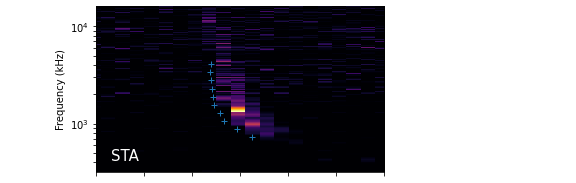

In [8]:
from matplotlib.image import NonUniformImage
fig = plt.figure(figsize=(5,2.5)) 
ax = fig.add_axes([0.15,0.05,0.8,0.92])

im = NonUniformImage(ax, interpolation='nearest',extent=[x0[0],x0[-1],rebin_freq_all[0],rebin_freq_all[-1]],cmap='inferno')
lin_freq = np.linspace(rebin_freq_all[0],rebin_freq_all[-1],rebin_freq_all.shape[0])
im.set_data(x0,lin_freq,(rebin_data_all[idx_range,:].T))
ax.images.append(im)
im.set_clim([0,2])
ax.set_yscale('log')
ax.set_ylabel('Frequency (kHz)')
ax.set_xlim([2200,3400])
ax.set_ylim([rebin_freq_all[0],rebin_freq_all[-1]])
ax.set_aspect('auto', 'datalim')
#ax.set_xlabel('Seconds from : '+str(dt_anchor))
ax.plot(t_ste_select_ste,freq_ste_select,'C0+')
ax.text(0.1, 0.1,'STA',color='w',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=15)
ax.xaxis.set_ticklabels([]) 
ax.yaxis.set_major_locator(plt.LogLocator(base=10,subs='all'))
fig.savefig('img/STA.pdf')

In [9]:
np.savez('tmpData/WI_STA_LE.npz',freq_STA = freq_ste_select, t_STA = t_ste_select_ste,
                freq_WI = freq_wi_select, t_WI = t_ste_select_wi)

In [10]:
np.savez('tmpData/STA_data.npz',
ds_t_STA = x0,ds_f_STA = rebin_freq_all,data_STA=rebin_data_all[idx_range,:])

In [11]:
fname_ste = '../../testdata/wi_h1_wav_20190409_v01.cdf'
cdf_dataset = pycdf.CDF(fname_ste)

In [12]:
time_wi = np.array(cdf_dataset.get('Epoch'))
freq_wi1 = np.array(cdf_dataset.get('Frequency_RAD1'))
freq_wi2 = np.array(cdf_dataset.get('Frequency_RAD2'))
data_wi1 = np.array(cdf_dataset.get('E_VOLTAGE_RAD1'))
data_wi2 = np.array(cdf_dataset.get('E_VOLTAGE_RAD2'))

C:\Users\Pjer1\Anaconda3\envs\lofarsun\lib\site-packages\spacepy\pycdf\__init__.py:3957: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.degen = numpy.zeros(self.dims, dtype=numpy.bool)
C:\Users\Pjer1\Anaconda3\envs\lofarsun\lib\site-packages\spacepy\pycdf\__init__.py:3958: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.rev = numpy.zeros(sel

In [13]:
data_wi = np.concatenate((data_wi1,data_wi2),1)
freq_wi = np.concatenate((freq_wi1,freq_wi2))

In [14]:
dt_anchor = datetime.datetime(2019,4,9,12,0,0)
anchor_time = mdates.date2num(dt_anchor)

sec_all = (mdates.date2num(time_wi)-anchor_time)*3600*24

dyspec = data_wi.T
dyspec[np.isnan(dyspec)]=1e-30
dyspec_const_backsub = dyspec-np.tile(np.mean(dyspec,1).T,(dyspec.shape[1],1)).T

# resample
from scipy.interpolate import interp2d

f = interp2d(sec_all,freq_wi,dyspec_const_backsub)

rebin_freq_all=np.logspace(2.5,4.2,200)
rebin_t_all=sec_all
rebin_data_all=f(rebin_t_all,rebin_freq_all).T

In [15]:
idx_range = np.arange(750,790)
arr_x = np.log10(rebin_data_all[idx_range,0])
N_arr_x=arr_x.ravel().shape[0]
idx_x = np.arange(N_arr_x)
x0 = rebin_t_all[idx_range]

<ipython-input-15-bdb3eeb5e321>:2: RuntimeWarning: invalid value encountered in log10
  arr_x = np.log10(rebin_data_all[idx_range,0])


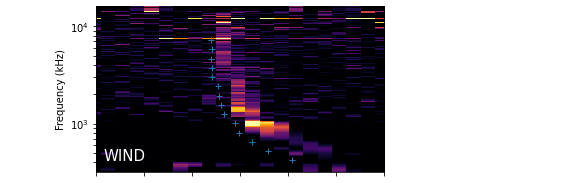

In [16]:
from matplotlib.image import NonUniformImage
fig = plt.figure(figsize=(5,2.5)) 
ax = fig.add_axes([0.15,0.05,0.8,0.92])

im = NonUniformImage(ax, interpolation='nearest',extent=[x0[0],x0[-1],rebin_freq_all[0],rebin_freq_all[-1]],cmap='inferno')
lin_freq = np.linspace(rebin_freq_all[0],rebin_freq_all[-1],rebin_freq_all.shape[0])
im.set_data(x0,lin_freq,(rebin_data_all[idx_range,:].T))
ax.images.append(im)
im.set_clim([0,0.1])
ax.set_yscale('log')
ax.set_xlim([2200,3400])
ax.set_ylim([rebin_freq_all[0],rebin_freq_all[-1]])
ax.set_aspect('auto', 'datalim')
ax.set_ylabel('Frequency (kHz)')
#ax.set_xlabel('Seconds from : '+str(dt_anchor))
ax.plot(t_ste_select_wi,freq_wi_select,'C0+')
ax.yaxis.set_major_locator(plt.LogLocator(base=10,subs='all'))
ax.text(0.1, 0.1,'WIND',color='w',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=15)
ax.xaxis.set_ticklabels([]) 
fig.savefig('img/WI.pdf')

In [17]:

np.savez('tmpData/WI_data.npz',
ds_t_WI = x0,ds_f_WI = rebin_freq_all,data_WI=rebin_data_all[idx_range,:])